In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
cust = pd.read_csv('olist_customers_dataset.csv')

In [3]:
cust.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
cust.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [6]:
cust.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

In [5]:
orders = pd.read_csv('olist_orders_dataset.csv', 
                     parse_dates=['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'])

In [6]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [9]:
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [10]:
orders.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [11]:
orders.shape

(99441, 8)

In [96]:
orders.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

<i>количество уникальных order_id = количеству записей, значит на 1 заказ, есть только 1 запись. Можно сделать вывод, что заказ содержит актуальный (последний) статус</i>

In [31]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

## 1. Сколько у нас пользователей, которые совершили покупку только один раз?

Посмотрим на статусы заказов invoiced unavailable и canceled. 

In [6]:
orders.query("order_status == 'invoiced'").head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
455,38b7efdf33dd5561f4f5d4f6e07b0414,021e84751ba0ead75b6d314a6ead88d9,invoiced,2017-08-01 18:17:41,2017-08-01 18:32:30,NaT,NaT,2017-08-28
1833,51b0dccc8596ce37a930dff2d63a10a2,31bf1057b00f14804278590bbac18b1b,invoiced,2017-05-05 22:34:48,2017-05-05 22:45:12,NaT,NaT,2017-06-06
2116,5504eaa5a86eb25fa666cf2e6b96c701,a30be38e1ed0ffb39b318bf1d15e98d9,invoiced,2017-11-29 08:33:06,2017-11-29 08:56:23,NaT,NaT,2017-12-20
2649,c3a6dc9afef5794ea4a867b5a18e0ad1,0c305f688ce08dc9402a2164fd6f29d6,invoiced,2017-11-25 14:10:20,2017-11-25 17:32:57,NaT,NaT,2017-12-19
2873,566c5bff1142c9d6003a83fd2e8ad1e5,892022d497c9598ce4a313f64ceaa87e,invoiced,2017-11-23 18:03:23,2017-11-23 18:25:18,NaT,NaT,2017-12-18
3121,b4c9f083bce61caf47fb38f9ba058bce,6ce60503e530d8a67926e9b8e3fdb635,invoiced,2017-08-05 16:00:56,2017-08-05 16:15:16,NaT,NaT,2017-08-30
3615,f029d5966aa03c87e17e2482f86202b1,ece9fb6661a1dc0cd93f5f8c9cf13b83,invoiced,2017-10-23 21:44:36,2017-10-23 21:56:09,NaT,NaT,2017-11-14
3983,6a828279d73f18174dd3b9c653d5213d,c994647aae9a45b8ae6eb75b77354ed3,invoiced,2017-06-25 17:54:26,2017-06-25 18:05:22,NaT,NaT,2017-07-14


In [7]:
orders.query("order_approved_at == 'NaT'").order_status.unique()

array(['canceled', 'delivered', 'created'], dtype=object)

<i>Если поле order_approved_at - пустое и статуса заказа invoiced нет, делаю вывод, что <b>invoiced = оплачено, а не просто выставлен счет</b></i>

In [21]:
orders.query("order_status == 'unavailable'").head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05
737,d57e15fb07fd180f06ab3926b39edcd2,470b93b3f1cde85550fc74cd3a476c78,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaT,NaT,2018-02-06
1160,2f634e2cebf8c0283e7ef0989f77d217,7353b0fb8e8d9675e3a704c60ca44ebe,unavailable,2017-09-27 20:55:33,2017-09-28 01:32:50,NaT,NaT,2017-10-27
1579,ee0db22a8e742b752914016708470ec8,aae50600d30bf2efe013ca4c1754ded7,unavailable,2017-08-24 11:04:41,2017-08-24 11:15:11,NaT,NaT,2017-09-18
1826,6ad57aecbae806a7e9cc2cdb6b380711,d31dbd02ac052d662285f678f8994326,unavailable,2017-11-30 07:48:24,2017-11-30 08:14:42,NaT,NaT,2017-12-29
2148,9f3458f0433d4cfa472f4682654b8d49,99ebfafde8b9e58fd12db9d5cc83132f,unavailable,2017-07-18 23:36:55,2017-07-18 23:50:17,NaT,NaT,2017-08-09
2296,f0df036e9be21fc238f131bbfcdde769,1fa16395beca89233661543954ca6cf1,unavailable,2017-02-24 23:39:21,2017-02-24 23:45:14,NaT,NaT,2017-04-07
2316,86f0bcd9b426a2c1022ae317c7f27be6,dd24965dd5aa551df36ce4baf180445b,unavailable,2017-03-08 15:13:03,2017-03-08 15:13:03,NaT,NaT,2017-03-29


In [22]:
orders.query("order_status == 'canceled'").head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaT,NaT,2018-08-14
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22
1058,3a129877493c8189c59c60eb71d97c29,0913cdce793684e52bbfac69d87e91fd,canceled,2018-01-25 13:34:24,2018-01-25 13:50:20,2018-01-26 21:42:18,NaT,2018-02-23
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1811,0966b61e30c4a07edbd7523f59b3f3e4,2fcc597b8934d99715dbfff7909dd27f,canceled,2018-05-22 18:50:55,2018-05-22 19:17:15,NaT,NaT,2018-07-03
1819,9021cf1919f615a121410790dcce848f,7acf55df0298e1d2c31200fb4f6fb93b,canceled,2018-07-04 16:05:56,2018-07-06 02:55:16,NaT,NaT,2018-08-22
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
1971,a39d3db795a5cf4c8b6c9dd050f0d326,ec66df2cb66dfda07c03050470e21f69,canceled,2017-03-13 16:12:24,2017-03-13 16:12:24,NaT,NaT,2017-03-30
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13


<b> <i>За покупки будем считать все заказы, кроме заказов в статусе canceled</i></b> 

In [7]:
orders_w_o_canceled = orders.query("order_status != 'canceled'")

In [8]:
orders_w_cust = orders_w_o_canceled.merge(cust, on = 'customer_id')

In [7]:
orders_w_cust.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [6]:
orders_w_cust.groupby('customer_unique_id', as_index = False)\
    .agg({'order_id':'count'})\
    .rename(columns = {'order_id':'count_orders'})\
    .sort_values('count_orders', ascending = False)\
    .count_orders.value_counts()

1     92636
2      2688
3       187
4        30
5         8
6         6
7         3
17        1
9         1
Name: count_orders, dtype: int64

### 92636 клиентов совершили только 1 покупку

___

## 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

In [9]:
orders_w_cust_w_canceled = orders.merge(cust, on = 'customer_id')

За недоставленные заказы будем принимать те, у которых отсутсвует дата фактической доставки

In [8]:
orders_w_cust_w_canceled.order_delivered_customer_date.isnull().sum()

2965

посмотрим на распределение статусов по заказам с пустой датой фактической доставки

In [40]:
orders_w_cust_w_canceled.query("order_delivered_customer_date == 'NaT'").order_status.value_counts()

shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered         8
created           5
approved          2
Name: order_status, dtype: int64

Полагаю, что заказы со статусом shipped - еще не успели доставиться, invoiced, processing, created, approved - еще не были переданы в доставку                                   
<b>Посмотрим что это за заказы такие у которых статус delivered, но дата пустая</b>

In [13]:
orders_w_cust_w_canceled.query("order_delivered_customer_date == 'NaT' and order_status == 'delivered'")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18,13467e882eb3a701826435ee4424f2bd,18520,cerquilho,SP
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16,2f17c5b324ad603491521b279a9ff4de,18255,quadra,SP
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaT,2018-07-30,1bd06a0c0df8b23dacfd3725d2dc0bb9,12445,pindamonhangaba,SP
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaT,2018-07-30,3bc508d482a402715be4d5cf4020cc81,13170,sumare,SP
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaT,2018-07-24,ebf7e0d43a78c81991a4c59c145c75db,13560,sao carlos,SP
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,NaT,2017-06-23,d77cf4be2654aa70ef150f8bfec076a6,91330,porto alegre,RS
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaT,2018-06-26,cce5e8188bf42ffb3bb5b18ff58f5965,7261,guarulhos,SP
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaT,2018-07-19,175378436e2978be55b8f4316bce4811,9431,ribeirao pires,SP


Выглядит как баг в данных

###### Посмотрим на заказы, где order_delivered_carrier_date пусто, какие там есть статусы

In [14]:
orders_w_cust_w_canceled.query("order_delivered_carrier_date == 'NaT'").order_status.value_counts()

unavailable    609
canceled       550
invoiced       314
processing     301
created          5
approved         2
delivered        2
Name: order_status, dtype: int64

In [10]:
#orders_w_cust_w_canceled['Order_Year_month'] = orders_w_cust_w_canceled.order_purchase_timestamp.dt.to_period("M")
orders_w_cust_w_canceled['Order_Year_month'] =(orders_w_cust_w_canceled['order_purchase_timestamp'].dt.floor('d') + pd.offsets.MonthEnd(0) - pd.offsets.MonthBegin(1))

In [50]:
orders_w_cust_w_canceled.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,Order_Year_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10-01


In [11]:
#оставим только статусы unavailable и canceled
reasons = orders_w_cust_w_canceled.query("order_status == 'unavailable' or order_status == 'canceled'")\
    .groupby(['Order_Year_month', 'order_status'], as_index = False)\
    .agg({'order_id':'count'})\
    .rename(columns = {'order_id':'count_orders'})\
    .groupby('order_status', as_index = False)\
    .agg({'count_orders':'mean'})\
    .rename(columns = {'order_status':'reason', 'count_orders':'avg_undelivered_offers_by_month'})

In [12]:
reasons

,reason,avg_undelivered_offers_by_month
0,canceled,26.041667
1,unavailable,29.000000


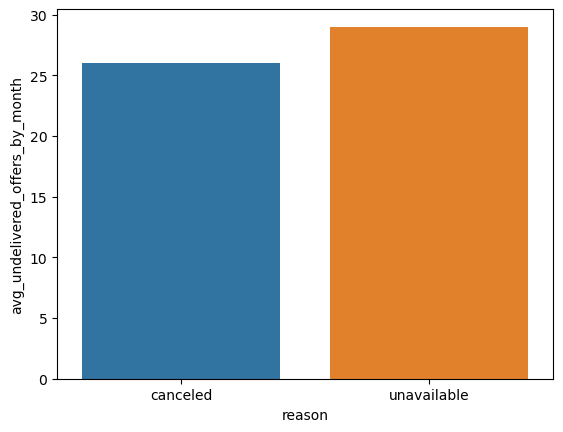

In [63]:
sns.barplot(data=reasons, x="reason", y="avg_undelivered_offers_by_month");

##### В среднем, 26 заказов в месяц не доставляются по причине отмены и 29 по причине отсутствия товаров

___

## 3. По каждому товару определить, в какой день недели товар чаще всего покупается.

In [13]:
orders_w_cust_w_canceled['Week_day'] = orders_w_cust_w_canceled.order_purchase_timestamp.dt.day_name()

In [27]:
orders_w_cust_w_canceled.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,Order_Year_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10-01


In [72]:
orders_w_cust_w_canceled.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'Order_Year_month', 'Week_day'],
      dtype='object')

In [14]:
order_by_week_day = orders_w_cust_w_canceled.drop(['customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'Order_Year_month'], axis =1)

In [11]:
order_by_week_day.head()

,order_id,Week_day
0,e481f51cbdc54678b7cc49136f2d6af7,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,Tuesday
2,47770eb9100c2d0c44946d9cf07ec65d,Wednesday
3,949d5b44dbf5de918fe9c16f97b45f8a,Saturday
4,ad21c59c0840e6cb83a9ceb5573f8159,Tuesday


In [15]:
items = pd.read_csv('olist_order_items_dataset.csv', parse_dates=['shipping_limit_date'])

In [82]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [83]:
items.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

In [87]:
items.product_id.nunique()

32951

In [108]:
items.order_id.nunique()

98666

In [88]:
items.shape

(112650, 7)

In [16]:
items_w_weekday = items.merge(order_by_week_day, on = 'order_id')

In [58]:
items_w_weekday.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,Week_day
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,Wednesday
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,Wednesday
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,Sunday
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,Wednesday
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,Saturday


In [17]:
most_freq_week_day = items_w_weekday.groupby(['product_id', 'Week_day'], as_index = False)\
                        .agg({'order_id':'count'})\
                        .rename(columns = {'order_id':'count'})\
                        .sort_values('count', ascending = False)\
                        .drop_duplicates(subset=['product_id'], keep = 'first')\
                        .reset_index(drop=True)
    
    
    

In [18]:
most_freq_week_day.head()

,product_id,Week_day,count
0,422879e10f46682990de24d770e7f83d,Wednesday,93
1,99a4788cb24856965c36a24e339b6058,Monday,92
2,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,89
3,53b36df67ebb7c41585e8d54d6772e08,Tuesday,76
4,389d119b48cf3043d311335e499d9c6b,Thursday,67


##### Определили в какой день недели какой товар чаще покупается. ПРи желании count можно дропнуть

___

## 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)?

In [175]:
orders_w_cust['Order_Year_month'] =(orders_w_cust['order_purchase_timestamp'].dt.floor('d') + pd.offsets.MonthEnd(0) - pd.offsets.MonthBegin(1))

In [204]:
orders_by_month = orders_w_cust.groupby(['customer_unique_id','Order_Year_month'], as_index = False)\
    .agg({'order_id':'count'})\
    .rename(columns = {'order_id':'count_of_orders'})

In [205]:
orders_by_month['Month_name'] = pd.DatetimeIndex(orders_by_month['Order_Year_month']).month_name()

In [189]:
orders_by_month.head()

,customer_unique_id,Order_Year_month,count_of_orders,Month_name
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,1,May
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-01,1,May
2,0000f46a3911fa3c0805444483337064,2017-03-01,1,March
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-01,1,October
4,0004aac84e0df4da2b147fca70cf8255,2017-11-01,1,November


In [195]:
orders_by_month.dtypes

customer_unique_id            object
Order_Year_month      datetime64[ns]
count_of_orders                int64
Month_name                    object
dtype: object

In [201]:
def weeks_per_mon(x):
    if x in ['January','March','May','July','August','October','December']:
        return round((31 / 7),2)
    elif x in ['April','June','Septeber','November']:
        return round((30 / 7),2)
    elif x == 'February':
        return round((28 / 7),2)

In [203]:
weeks_per_mon('November')

4.29

In [207]:
orders_by_month['Weeks_per_month'] = orders_by_month.Month_name.apply(lambda x: weeks_per_mon(x))

In [209]:
orders_by_month['Purch_per_week_month'] = orders_by_month['count_of_orders'] / orders_by_month['Weeks_per_month']

In [216]:
orders_by_month.head()

,customer_unique_id,Order_Year_month,count_of_orders,Month_name,Weeks_per_month,Purch_per_week_month
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,1,May,4.43,0.225734
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-01,1,May,4.43,0.225734
2,0000f46a3911fa3c0805444483337064,2017-03-01,1,March,4.43,0.225734
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-01,1,October,4.43,0.225734
4,0004aac84e0df4da2b147fca70cf8255,2017-11-01,1,November,4.29,0.233100


In [217]:
mean_count_of_purch = orders_by_month.groupby('customer_unique_id', as_index = False).agg({'Purch_per_week_month':'mean'})

In [233]:
mean_count_of_purch.Purch_per_week_month.describe()

count    91035.000000
mean         0.232945
std          0.028226
min          0.225734
25%          0.225734
50%          0.225734
75%          0.233100
max          1.354402
Name: Purch_per_week_month, dtype: float64

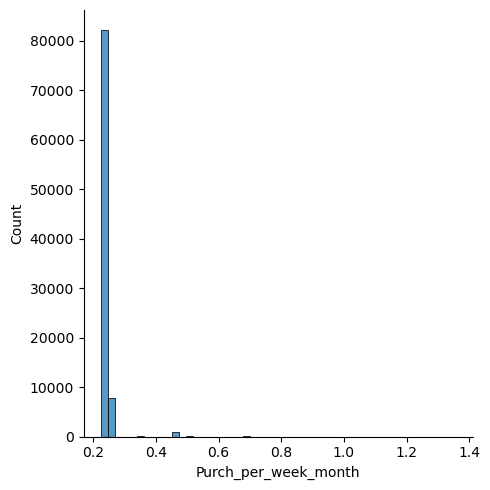

In [240]:
sns.displot(mean_count_of_purch['Purch_per_week_month'], bins = 50)

___

## 5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц. 

Формировать когорты будем по дате первой покупки<br>
Размер когорты - 1 месяц<br>
Отчетный период - январь-декабрь<br>
Анализируемый показатель - Retention rate

In [19]:
#orders_w_cust['Order_Year_month'] = orders_w_cust.order_purchase_timestamp.dt.to_period("M")
orders_w_cust['Order_Year_month'] =(orders_w_cust['order_purchase_timestamp'].dt.floor('d') + pd.offsets.MonthEnd(0) - pd.offsets.MonthBegin(1))
orders_w_cust.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,Order_Year_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10-01
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07-01
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08-01
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11-01
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2018-02-01


##### Найдем дату первой покупки для каждого клиента

In [20]:
first_order_date = orders_w_cust.groupby('customer_unique_id', as_index = False)\
    .agg({'Order_Year_month':'min'})\
    .rename(columns = {'Order_Year_month':'First_order_month'})

In [21]:
orders_w_cust = orders_w_cust.merge(first_order_date, on = 'customer_unique_id')

In [14]:
orders_w_cust.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,Order_Year_month,First_order_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10-01,2017-09-01
1,69923a4e07ce446644394df37a710286,31f31efcb333fcbad2b1371c8cf0fa84,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-04 21:22:15,2017-09-05 19:20:20,2017-09-15,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-09-01,2017-09-01
2,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07-01,2018-07-01
3,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08-01,2018-08-01
4,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11-01,2017-11-01


In [22]:
date_range = pd.DataFrame({'Date':pd.date_range('2017-01-01','2017-12-01', freq = 'MS')})

In [16]:
date_range

,Date
0,2017-01-01
1,2017-02-01
2,2017-03-01
3,2017-04-01
4,2017-05-01
5,2017-06-01
6,2017-07-01
7,2017-08-01
8,2017-09-01
9,2017-10-01


In [23]:
date_range['key'] = 1
first_order_date['key'] = 1

In [24]:
template = first_order_date.merge(date_range, on = 'key').drop(columns = 'key')

In [27]:
template.dtypes

customer_unique_id            object
First_order_date           period[M]
Date                  datetime64[ns]
dtype: object

In [19]:
template

,customer_unique_id,First_order_month,Date
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2017-01-01
1,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2017-02-01
2,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2017-03-01
3,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2017-04-01
4,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2017-05-01
...,...,...,...
1146715,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2017-08-01
1146716,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2017-09-01
1146717,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2017-10-01
1146718,ffffd2657e2aad2907e67c3e9daecbeb,2017-05-01,2017-11-01


##### найдем сумму товаров внутри одного чека

In [85]:
items_w_weekday.head(1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,Week_day
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,Wednesday


In [111]:
items_w_weekday.shape

(112650, 8)

In [114]:
items_w_weekday.query('order_item_id > 1').head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,Week_day
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37,Tuesday
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10,Monday
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10,Monday
43,001ab0a7578dd66cd4b0a71f5b6e1e41,2,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63,Wednesday
44,001ab0a7578dd66cd4b0a71f5b6e1e41,3,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63,Wednesday


In [115]:
items_w_weekday.query("order_id == '00143d0f86d6fbd9f9b38ab440ac16f5'")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,Week_day
32,00143d0f86d6fbd9f9b38ab440ac16f5,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1,Monday
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1,Monday
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1,Monday


##### Основываясь на запросе выше, делаю вывод, что каждая единица товара в чеке пробивается отдельно = имеет свою запись

In [25]:
total_order_sum = items_w_weekday.groupby(['order_id','product_id'], as_index = False)\
    .agg({'price':'sum'})\
    .rename(columns = {'price':'total_order_sum'})\
    .groupby('order_id', as_index = False)\
    .agg({'total_order_sum':'sum'})
    
    

добавим сумму заказа в наш датафрем

In [26]:
orders_w_cust = orders_w_cust.merge(total_order_sum, on = 'order_id')

In [27]:
mon_spend = orders_w_cust.groupby(['customer_unique_id','Order_Year_month'], as_index = False)\
    .agg({'total_order_sum':'sum'})\
    .rename(columns = {'total_order_sum':'cust_spend_per_mon', 'Order_Year_month':'Date'})

In [45]:
mon_spend.head()

,customer_unique_id,Date,cust_spend_per_mon
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-01,18.90
2,0000f46a3911fa3c0805444483337064,2017-03-01,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-01,25.99
4,0004aac84e0df4da2b147fca70cf8255,2017-11-01,180.00


In [28]:
report = template.merge(mon_spend, on = ['customer_unique_id','Date'], how = 'left')

In [29]:
report['First_order_month'] = report['First_order_month'].astype("string")
report['Date'] = report['Date'].astype("string")

In [30]:
report['is_active'] = report.cust_spend_per_mon.apply(lambda x: 1 if x > 0 else 0)

In [31]:
report = report.pivot_table(index = 'First_order_month', columns = 'Date', values = 'is_active', aggfunc='mean')

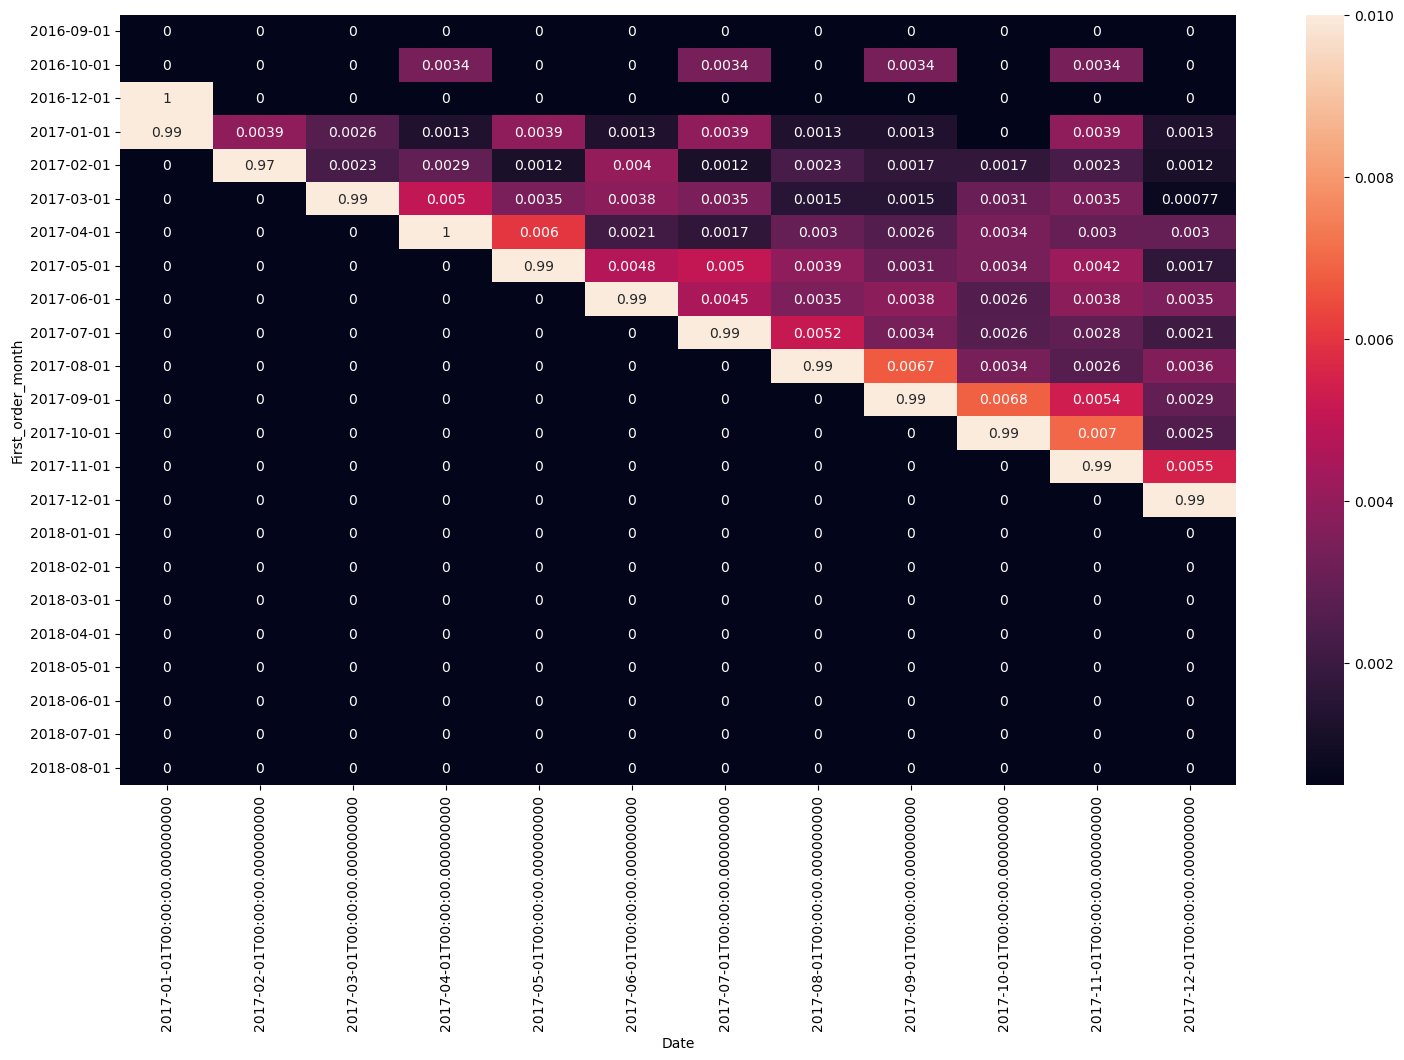

In [32]:
plt.figure(figsize=(18, 10))
sns.heatmap(report, annot=True,vmin=0.0005, vmax=0.01);

### Когорта с самым большим ретеншн (0.0054) на 3й месяц - клиенты с первой покупкой в сентябре 2017г

___

## 6. Используя python, построй RFM-сегментацию пользователей

In [34]:
orders_w_cust.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,Order_Year_month,First_order_month,total_order_sum
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10-01,2017-09-01,29.99
1,69923a4e07ce446644394df37a710286,31f31efcb333fcbad2b1371c8cf0fa84,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-04 21:22:15,2017-09-05 19:20:20,2017-09-15,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-09-01,2017-09-01,35.39
2,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07-01,2018-07-01,118.70
3,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08-01,2018-08-01,159.90
4,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11-01,2017-11-01,45.00


In [42]:
# за текущую дату примем следующий день после последнего заказа
NOW = (orders_w_cust['order_purchase_timestamp'].dt.floor('d').max() + pd.Timedelta(1, "d"))
NOW

Timestamp('2018-09-04 00:00:00')

In [44]:
print(orders_w_cust.order_purchase_timestamp.min())
print(orders_w_cust.order_purchase_timestamp.max())

2016-09-04 21:15:19
2018-09-03 09:06:57


В датасете присутсвуют данные за 2 года. Период выберем 730 дней

In [45]:
period = 730

In [46]:
#Добавляем количество дней, которые прошли после заказа
orders_w_cust['Days_after_Order'] = orders['order_purchase_timestamp'].apply(lambda x: (NOW - x).days)

In [47]:
orders_w_cust.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,Order_Year_month,First_order_month,total_order_sum,Days_after_Order
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10-01,2017-09-01,29.99,336


In [52]:
aggr = {
    'Days_after_Order': 'min',  # (Recency)
    'order_purchase_timestamp': lambda x: len([d for d in x if d >= NOW - pd.Timedelta(period, "d")]), # the total number of orders in the last period (Frequency)
    'total_order_sum':'sum'}


In [53]:
rfm = orders_w_cust.groupby('customer_unique_id').agg(aggr).reset_index()\
    .rename(columns={'Days_after_Order': 'Recency', 'order_purchase_timestamp': 'Frequency', 'total_order_sum':'Monetary'})


In [54]:
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,490,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,229,1,18.90
2,0000f46a3911fa3c0805444483337064,67,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,545,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,364,1,180.00


Найдем R F M scores

In [55]:
quintiles = rfm[['Recency', 'Frequency', 'Monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'Recency': {0.2: 97.0, 0.4: 182.0, 0.6: 273.0, 0.8: 389.0},
 'Frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'Monetary': {0.2: 39.9, 0.4: 69.9, 0.6: 109.9, 0.8: 179.9}}

In [74]:
rfm.Frequency.value_counts()

1     92102
2      2651
3       188
4        29
5         9
6         5
7         3
9         1
16        1
Name: Frequency, dtype: int64

Смущает, что для Frequency значение каждого из квантилей = 1

In [56]:
def r_score(x):
    if x <= quintiles['Recency'][.2]:
        return 5
    elif x <= quintiles['Recency'][.4]:
        return 4
    elif x <= quintiles['Recency'][.6]:
        return 3
    elif x <= quintiles['Recency'][.8]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5  

In [57]:
r_score(100)

4

In [58]:
rfm['R'] = rfm['Recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['Frequency'].apply(lambda x: fm_score(x, 'Frequency'))
rfm['M'] = rfm['Monetary'].apply(lambda x: fm_score(x, 'Monetary'))

In [65]:
rfm['RFM_score'] = rfm['R'].astype('string') + rfm['F'].astype('string') + rfm['M'].astype('string')

In [66]:
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM_score
0,0000366f3b9a7992bf8c76cfdf3221e2,490,1,129.90,1,1,4,114
1,0000b849f77a49e4a4ce2b2a4ca5be3f,229,1,18.90,3,1,1,311
2,0000f46a3911fa3c0805444483337064,67,1,69.00,5,1,2,512
3,0000f6ccb0745a6a4b88665a16c9f078,545,1,25.99,1,1,1,111
4,0004aac84e0df4da2b147fca70cf8255,364,1,180.00,2,1,5,215


In [67]:
segt_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at risk',
    r'[1-2]5': 'can\'t loose',
    r'3[1-2]': 'about to sleep',
    r'33': 'need attention',
    r'[3-4][4-5]': 'loyal customers',
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5][2-3]': 'potential loyalists',
    r'5[4-5]': 'champions'
}

In [68]:
rfm['Segment'] = rfm['R'].astype('string') + rfm['F'].astype('string')

In [70]:
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)


In [71]:
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM_score,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,490,1,129.90,1,1,4,114,hibernating
1,0000b849f77a49e4a4ce2b2a4ca5be3f,229,1,18.90,3,1,1,311,about to sleep
2,0000f46a3911fa3c0805444483337064,67,1,69.00,5,1,2,512,new customers
3,0000f6ccb0745a6a4b88665a16c9f078,545,1,25.99,1,1,1,111,hibernating
4,0004aac84e0df4da2b147fca70cf8255,364,1,180.00,2,1,5,215,hibernating


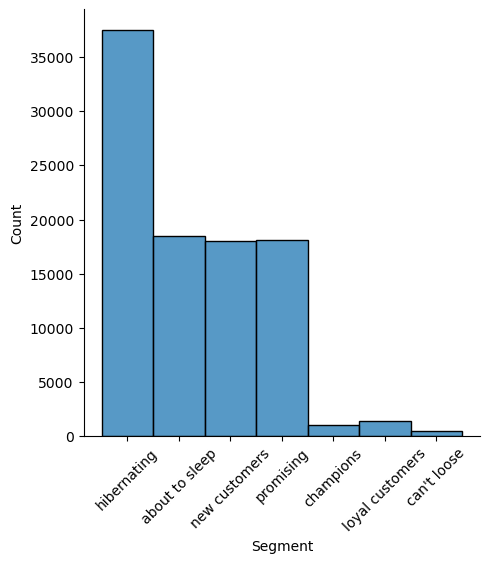

In [87]:
plot = sns.displot(rfm.Segment)
plot.set_xticklabels(rotation=45)

In [89]:
import squarify

In [110]:
labels = rfm.groupby('Segment', as_index = False).agg({'customer_unique_id':'count'}).Segment.to_list()

In [100]:
values = rfm.groupby('Segment', as_index = False).agg({'customer_unique_id':'count'}).customer_unique_id.to_list()

In [101]:
values

[18450, 447, 1056, 37527, 1384, 17986, 18139]

(0.0, 100.0, 0.0, 100.0)

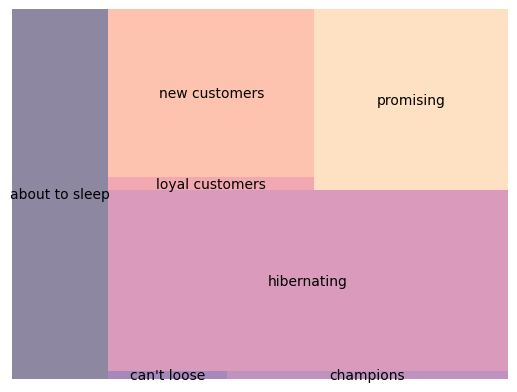

In [116]:
colors = ['#91DCEA', '#64CDCC', '#5FBB68',
          '#F9D23C', '#F9A729', '#FD6F30']

squarify.plot(sizes = values,
              color = sns.color_palette("magma",len(values)), alpha = 0.5, 
              label = labels)
# Remove the axis:
plt.axis("off")



###### Альтернативный вариант. С другой сегментацией по Frequency

In [119]:
quintiles['Frequency'] = {0.2: 1.0, 0.4: 2.0, 0.6: 3.0, 0.8: 4.0}

In [120]:
quintiles

{'Recency': {0.2: 97.0, 0.4: 182.0, 0.6: 273.0, 0.8: 389.0},
 'Frequency': {0.2: 1.0, 0.4: 2.0, 0.6: 3.0, 0.8: 4.0},
 'Monetary': {0.2: 39.9, 0.4: 69.9, 0.6: 109.9, 0.8: 179.9}}

In [121]:
rfm2 = orders_w_cust.groupby('customer_unique_id').agg(aggr).reset_index()\
    .rename(columns={'Days_after_Order': 'Recency', 'order_purchase_timestamp': 'Frequency', 'total_order_sum':'Monetary'})

In [122]:
rfm2['R'] = rfm2['Recency'].apply(lambda x: r_score(x))
rfm2['F'] = rfm2['Frequency'].apply(lambda x: fm_score(x, 'Frequency'))
rfm2['M'] = rfm2['Monetary'].apply(lambda x: fm_score(x, 'Monetary'))
rfm2['RFM_score'] = rfm2['R'].astype('string') + rfm2['F'].astype('string') + rfm2['M'].astype('string')

In [124]:
rfm2['Segment'] = rfm2['R'].astype('string') + rfm2['F'].astype('string')
rfm2['Segment'] = rfm2['Segment'].replace(segt_map, regex=True)

In [125]:
rfm2.head()

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM_score,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,490,1,129.90,1,1,4,114,hibernating
1,0000b849f77a49e4a4ce2b2a4ca5be3f,229,1,18.90,3,1,1,311,about to sleep
2,0000f46a3911fa3c0805444483337064,67,1,69.00,5,1,2,512,new customers
3,0000f6ccb0745a6a4b88665a16c9f078,545,1,25.99,1,1,1,111,hibernating
4,0004aac84e0df4da2b147fca70cf8255,364,1,180.00,2,1,5,215,hibernating


In [170]:
labels2 = rfm2.groupby('Segment', as_index = False).agg({'customer_unique_id':'count'}).Segment.to_list()
values2 = rfm2.groupby('Segment', as_index = False).agg({'customer_unique_id':'count'}).customer_unique_id.to_list()

(0.0, 100.0, 0.0, 100.0)

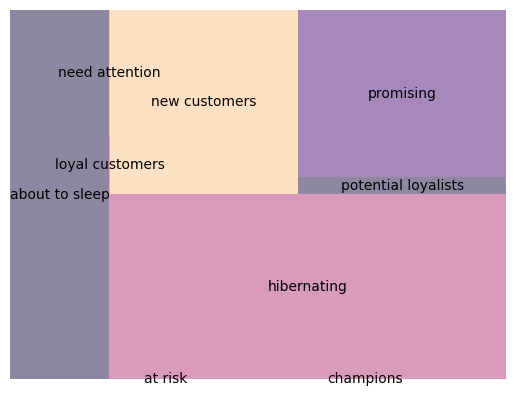

In [171]:
colors = ['#91DCEA', '#64CDCC', '#5FBB68',
          '#F9D23C', '#F9A729', '#FD6F30']

squarify.plot(sizes = values2,
              color = sns.color_palette("magma",len(values)), alpha = 0.5, 
              label = labels2)
# Remove the axis:
plt.axis("off")